In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
#visualizer
import sys
sys.path.append("../src")

import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from data import unnormalize

def visualize(sample_imgs, target_imgs, output_imgs):
    #visualize 11 sample images in the first row, 11 target images in the second row, and the 11 outputs of the model in the third row
    
    fig, axs = plt.subplots(3, 11, figsize=(20, 6))
    for i in range(11):
        axs[0, i].imshow(unnormalize(sample_imgs[i]).movedim(0, -1))
        axs[0, i].set_title(f"input:{i}")
        axs[0, i].axis('off')

        axs[1, i].imshow(unnormalize(sample_imgs[i + 11]).movedim(0, -1))
        axs[1, i].set_title(f"input:{i + 11}")
        axs[1, i].axis('off')

        if i < len(output_imgs):
            output_img_unnormalized = unnormalize(output_imgs[i]).movedim(0, -1)
            axs[2, i].imshow(output_img_unnormalized)
            axs[2, i].set_title(f"output:{i}")
        axs[2, i].axis('off')

        # axs[3, i].imshow(target_imgs_unstack)
        # axs[3, i].set_title(f"target:{i}")
        # axs[3, i].axis('off')
    
    plt.tight_layout()
    plt.show()
    fig.savefig("predictions.png")
    plt.close(fig)

In [3]:
# from simvp_model import SimVP_Model

from data import ValidationDataset
import torch

val_dataset = ValidationDataset('../Dataset_Student/')
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=2, shuffle=False, num_workers=1)

# large_dataset = UnlabeledDataset_pred('/scratch/py2050/new_dataset/Dataset_Student/')
# large_dataloader = torch.utils.data.DataLoader(large_dataset, batch_size=2, shuffle=False, num_workers=1)

# hidden_dataset = HiddenDataset_pred('/scratch/py2050/new_dataset/Dataset_Student/')
# hidden_dataloader = torch.utils.data.DataLoader(hidden_dataset, batch_size=2, shuffle=False, num_workers=1)
# model = SimVP_Model(in_shape=(11,3,160,240), hid_S= 64, hid_T= 512, N_T=8, N_S=4, drop_path=0.1)


In [4]:
from simvp.simvp import SimVP_Model, DecoderProxy

model_path = "../simvp_autoreg.pth"

model = torch.load(model_path, map_location=torch.device('cpu'))
# model.out_shape=(11, 3, 160, 240)

In [24]:
import random
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.eval()
with torch.no_grad():
    #generate a random number in range of dataset
    sample_imgs, sample_target = val_dataset[random.randint(0, len(val_dataset)-1)]

    #use x to input to model
    x = sample_imgs.to(device)
    x = x.unsqueeze(0) #add batch dim
    x = x[:,:11]

    for i in range(11):
        output = model(x[:,i:])
        x = torch.cat((x, output), dim=1)
        print(f"Predicted frame {i} of output")

    print(x.shape)
    output = x[:,11:].detach().cpu().squeeze(0)



Predicted frame 0 of output
Predicted frame 1 of output
Predicted frame 2 of output
Predicted frame 3 of output
Predicted frame 4 of output
Predicted frame 5 of output
Predicted frame 6 of output
Predicted frame 7 of output
Predicted frame 8 of output
Predicted frame 9 of output
Predicted frame 10 of output
torch.Size([1, 22, 3, 160, 240])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


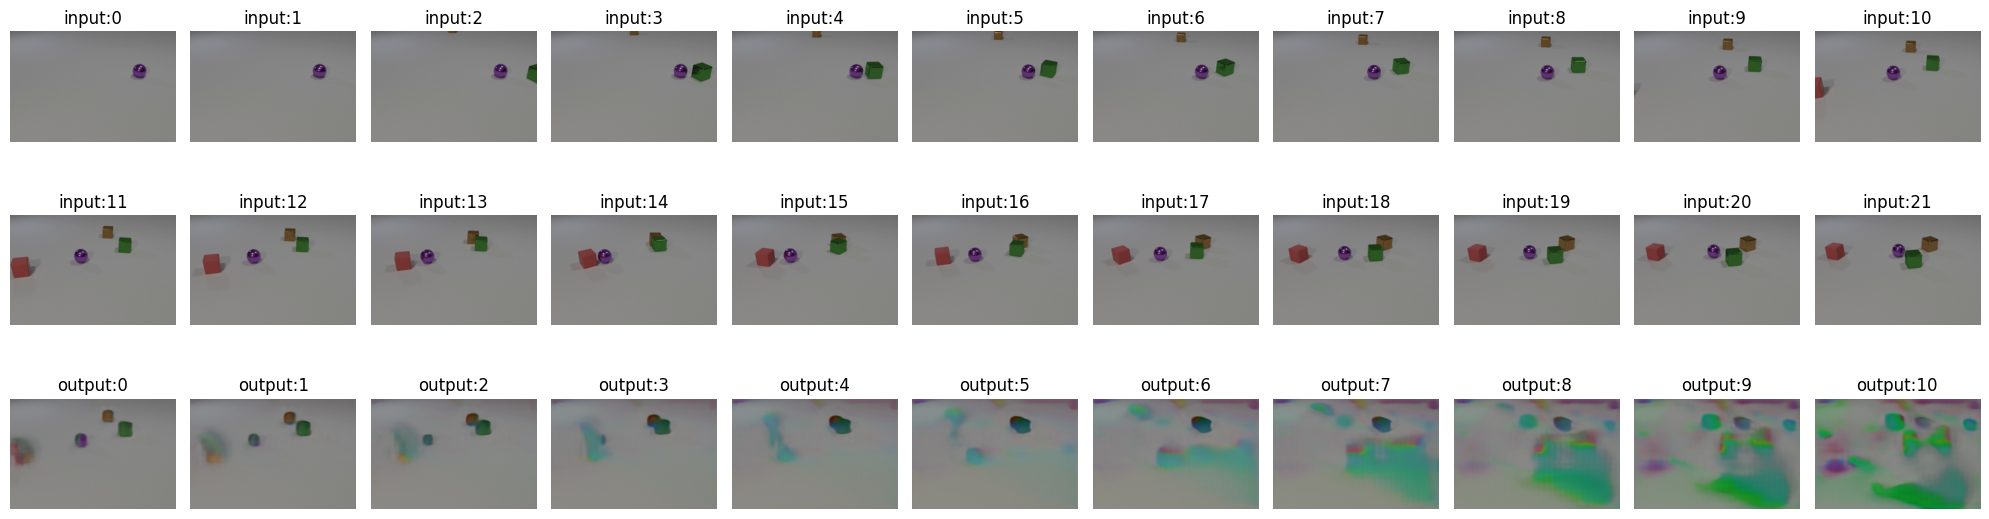

In [27]:
sample_imgs_unstack = torch.unbind(sample_imgs, dim=0)
sample_target_unstack = torch.unbind(torch.tensor(sample_target).float(), dim=0)
output_unstack = torch.unbind(output, dim=0)
visualize(sample_imgs_unstack, sample_target_unstack, output_unstack)
